# 1. Matplotlib overview

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Matplotlib의 2가지 인터페이스

- Matplolib이 배우고 익히기 어려운 이유 중 하나

In [8]:
import FinanceDataReader as fdr

samsung_df = fdr.DataReader('005390','2017-01-01','2017-12-31')
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,1260,1300,1255,1295,1232965,0.040161
2017-01-03,1305,1315,1280,1310,886559,0.011583
2017-01-04,1305,1310,1280,1305,446070,-0.003817
2017-01-05,1305,1330,1300,1320,721691,0.011494
2017-01-06,1320,1345,1305,1325,645608,0.003788


## 2.1. Stateful

- Matplotlib이 암묵적으로 현재 상태를 들고 있음
  - 내부적으로 현재 타겟이 되는 figure, ax 등을 설정하고, operation이 발생하면 '내부에서' 해당 figure,ax에 적용함
- 사용은 비추
  - matplotlib이 암묵적, 내부적으로 변화를 진행하고 적용하기 때문에, 직관적이지 못함
  - 다수의 plot을 한번에 그리기 어려움
  - 그냥 간단히 테스트 해볼 때 정도에만 사용

In [9]:
x = [1,2,3]
y = [4,5,6]

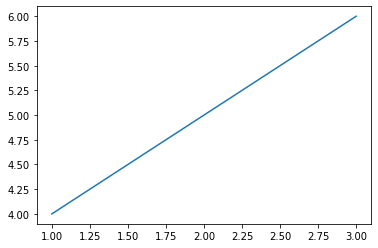

In [10]:
plt.plot(x,y)
# plt.show()

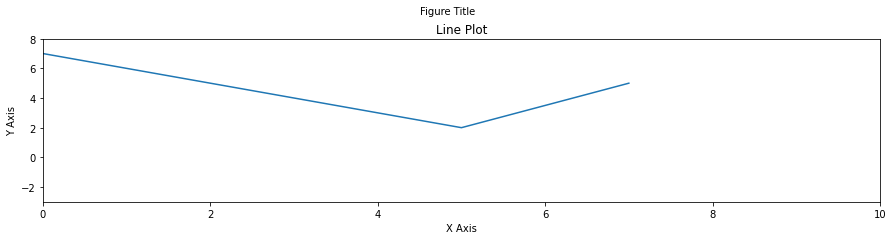

In [12]:
x = [-3,5,7]
y = [10,2,5]

plt.figure(figsize=(15,3));
plt.plot(x, y);
plt.xlim(0,10);
plt.ylim(-3,8);
plt.xlabel('X Axis');
plt.ylabel('Y Axis');
plt.title('Line Plot');
plt.suptitle('Figure Title', size=10, y=1.03);

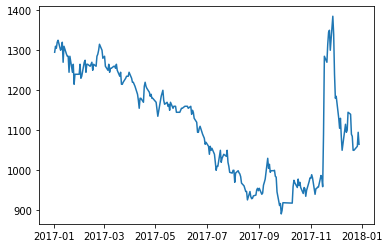

In [13]:
plt.plot(samsung_df.index, samsung_df['Close'])

## 2.2. Stateless(or object-oriented)

- Matplotlib의 각 component를 하나의 object로 받아서 함수 실행 및 property 설정/변경
  - figure, ax(es)를 먼저 생성한 다음, 하나하나 더하고, 적용한느 식
- 적용과정이 명시적으로 코드로 드러나기 때문에 조금 더 직관적임

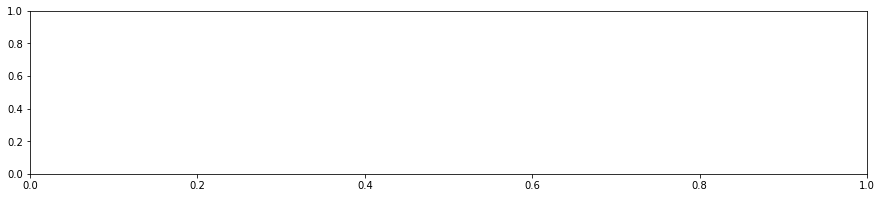

In [15]:
x = [-3, 5, 7]
y = [10,2, 5]

fig, ax = plt.subplots(figsize=(15,3))

In [17]:
type(fig)
type(ax)

matplotlib.figure.Figure

matplotlib.axes._subplots.AxesSubplot

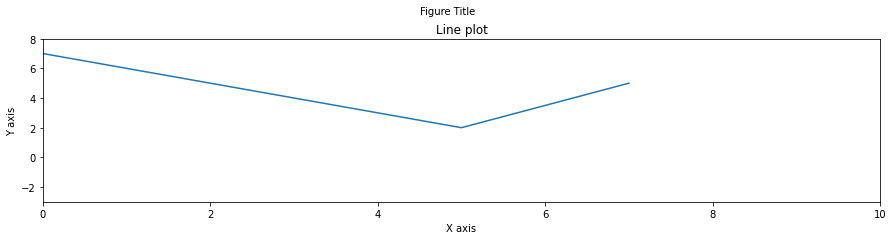

In [23]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x,y);
ax.set_xlim(0,10);
ax.set_ylim(-3,8);
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_title('Line plot');
fig.suptitle('Figure Title', size = 10, y =1.03);

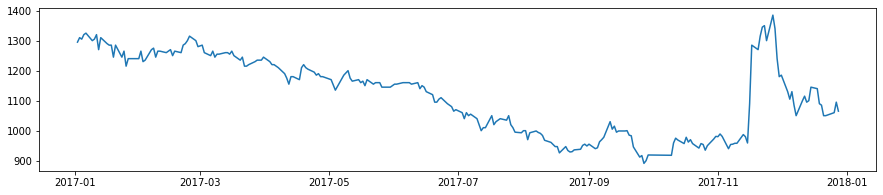

In [25]:
fig,ax = plt.subplots(figsize=(15,3))
ax.plot(samsung_df.index, samsung_df['Close'])

# 3. Matplotlib components에 대해 조금 더 깊게 들여다보기

## 3.1. figure, axes

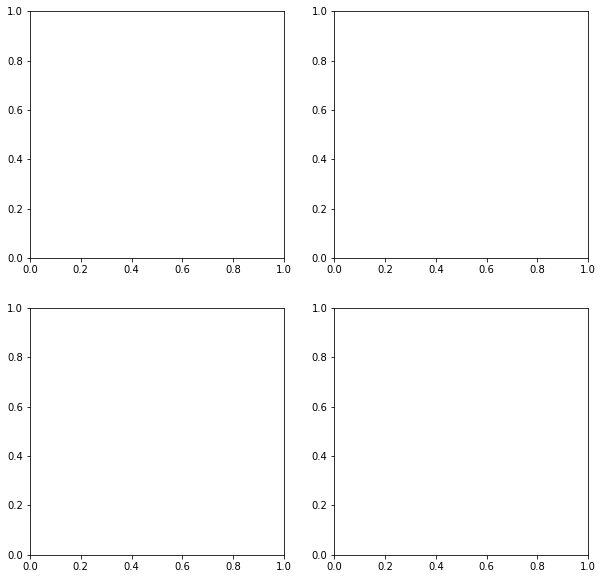

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

In [35]:
type(axes)
axes

numpy.ndarray

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

## 3.2. Children of ax(es)

In [36]:
axes[0][0].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

- spines : axes를 둘러싸고 있는 border
- axis : x,y축
  - ticks, labels 등을 가지고 있음

## 3.3. 예제

In [37]:
data = fdr.DataReader("005930", start="2019-01-01",end="2020-01-01")
close_series = data['Close']
volume_series = data['Volume']

In [38]:
close_series.head()
volume_series.head()

Date
2019-01-02    38750
2019-01-03    37600
2019-01-04    37450
2019-01-07    38750
2019-01-08    38100
Name: Close, dtype: int64

Date
2019-01-02     7847664
2019-01-03    12471493
2019-01-04    14108958
2019-01-07    12748997
2019-01-08    12756554
Name: Volume, dtype: int64

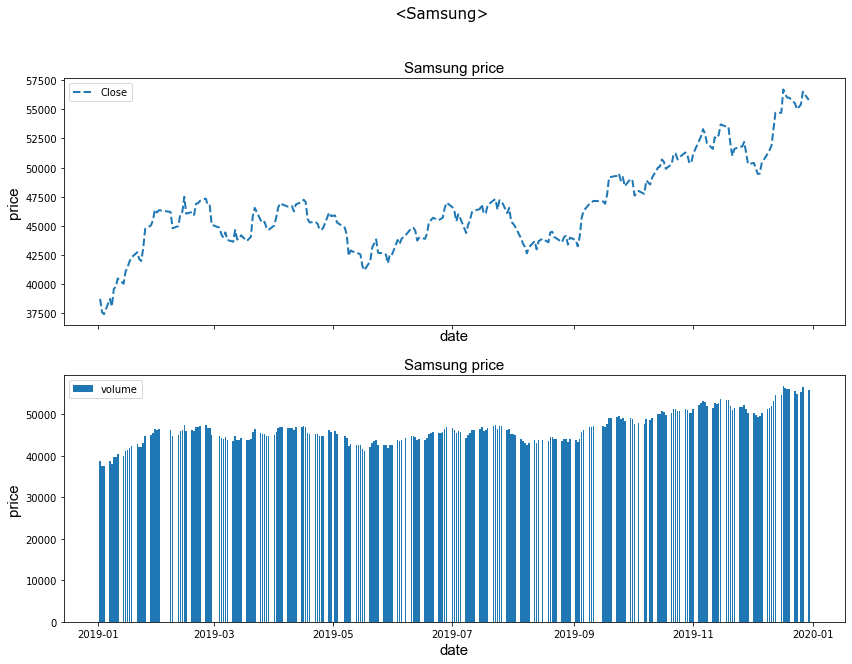

In [46]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(14,10), sharex=True)

ax1 = axes[0]
ax2 = axes[1]

ax1.plot(close_series.index, close_series, linewidth=2, linestyle='--', label="Close")
_ = ax1.set_title('Samsung price', fontsize=15, family='Arial');
_ = ax1.set_ylabel('price', fontsize=15, family='Arial');
_ = ax1.set_xlabel("date", fontsize=15, family= 'Arial');
ax1.legend(loc="upper left");

ax2.bar(volume_series.index, close_series, label="volume")
_ = ax2.set_title('Samsung price', fontsize=15, family='Arial');
_ = ax2.set_ylabel('price', fontsize=15, family='Arial');
_ = ax2.set_xlabel("date", fontsize=15, family= 'Arial');
ax2.legend(loc="upper left");

fig.suptitle("<Samsung>", fontsize=15,family='Verdana');

# 4.Plotting with Pandas

- DataFrame, Series는 plot()을 호출하면 내부저긍로 matplotlib api를 호출함
- plot을 시행한 후 ax를 return함
- matplotlib arg 는 그대로 전달 가능
- plot의 종류 (kind arg)
  - bar, line, scatter, etc
  - hist, box, etc

In [48]:
import pandas as pd

samsung_series = fdr.DataReader("005930","2017-01-01","2018-01-01")['Close']
kodex_series = fdr.DataReader("069500","2017-01-01","2018-01-01")['Close']

In [49]:
price_df = pd.concat([samsung_series, kodex_series], axis=1)
price_df.columns = ["삼성전자", "KODEX 200"]
price_df.head()

,삼성전자,KODEX 200
Date,,
2017-01-02,36100,23789
2017-01-03,36480,23979
2017-01-04,36160,24007
2017-01-05,35560,23912
2017-01-06,36200,24015


In [50]:
price_max_df = price_df.groupby(price_df.index.month).max()
price_max_df.head()

,삼성전자,KODEX 200
Date,,
1,39900,24667
2,39560,24901
3,42560,25880
4,44620,26319
5,47020,28218


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49340 missing from c

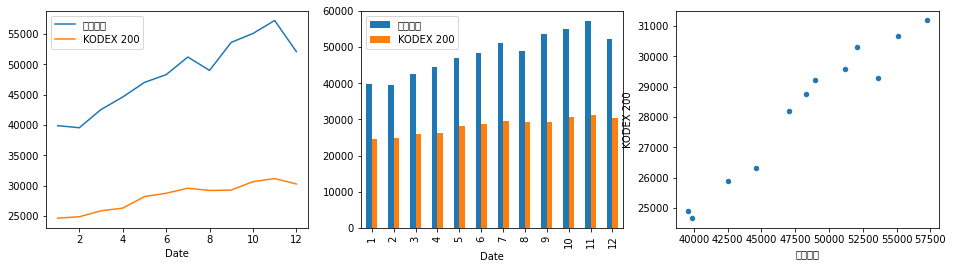

In [52]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

price_max_df.plot(ax=ax1, kind='line');
price_max_df.plot(ax=ax2, kind='bar');
price_max_df.plot(ax=ax3, x='삼성전자',y='KODEX 200', kind='scatter');

array([[<AxesSubplot:title={'center':'삼성전자'}>,
        <AxesSubplot:title={'center':'KODEX 200'}>]], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49340 missing from c

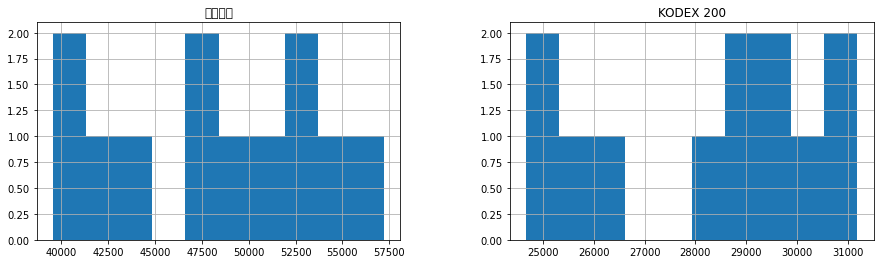

In [53]:
price_max_df.hist(figsize=(15,4))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49340 missing from c

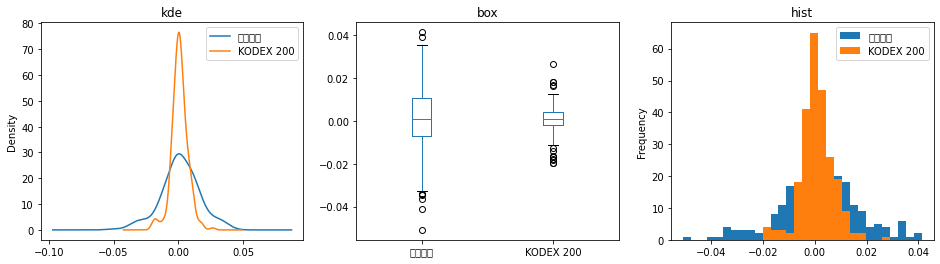

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(kind='box',ax=ax2,title='box');
price_df.pct_change().plot(kind='hist',ax=ax3,title='hist', bins=30);

### 한글 Font

In [55]:
import matplotlib.font_manager as fm

In [57]:
for f in fm.fontManager.ttflist:
    if 'Gothic' in f.name:
        print((f.name,f.fname))

('Noto Sans Gothic', '/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf')
('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf')
('Hiragino Maru Gothic Pro', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc')
('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc')


In [58]:
plt.rcParams["font.family"] = 'AppleGothic'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


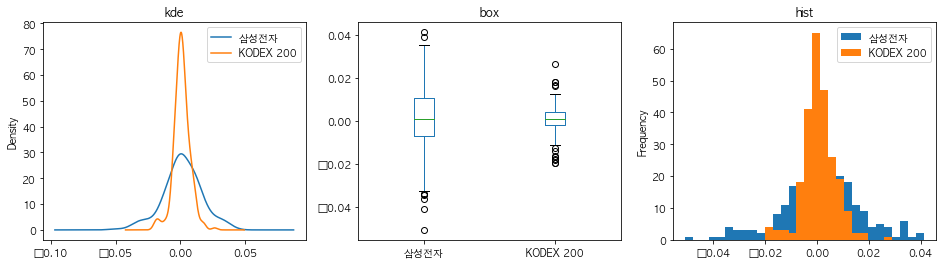

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(kind='box',ax=ax2,title='box');
price_df.pct_change().plot(kind='hist',ax=ax3,title='hist', bins=30);